In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"Combined_Smart_Buldings.csv")

Basic Information About the Dataset:

In [4]:
data.shape

(14381639, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14381639 entries, 0 to 14381638
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   timestamp    int64  
 1   co2          float64
 2   humidity     float64
 3   light        float64
 4   pir          float64
 5   temperature  float64
 6   roomid       object 
dtypes: float64(5), int64(1), object(1)
memory usage: 768.1+ MB


In [6]:
data.head()

,timestamp,co2,humidity,light,pir,temperature,roomid
0,1377299107,488.0,45.34,97.0,NaN,23.93,413
1,1377299108,495.0,45.34,97.0,0.0,23.94,413
2,1377299110,487.0,45.34,97.0,0.0,23.94,413
3,1377299126,487.0,45.34,97.0,0.0,23.93,413
4,1377299127,496.0,45.34,97.0,0.0,23.93,413


In [7]:
data.tail()

,timestamp,co2,humidity,light,pir,temperature,roomid
14381634,1378018692,509.0,54.14,64.0,0.0,24.41,776
14381635,1378018702,509.0,54.14,64.0,0.0,24.41,776
14381636,1378018712,509.0,54.14,64.0,0.0,24.41,776
14381637,1378018722,509.0,54.14,64.0,0.0,24.41,776
14381638,1378018732,509.0,54.14,64.0,0.0,24.41,776


In [8]:
data.describe()

,timestamp,co2,humidity,light,pir,temperature
count,1.438164e+07,1.436170e+07,1.438017e+07,1.438017e+07,1.430236e+07,1.438017e+07
mean,1.377641e+09,4.114451e+02,5.670891e+01,8.227788e+01,1.307040e+00,2.395012e+01
std,2.000119e+05,1.037703e+02,4.340268e+00,3.062264e+02,1.908106e+01,2.076613e+01
min,1.377270e+09,8.000000e+00,-5.009600e+02,0.000000e+00,0.000000e+00,-4.010000e+01
25%,1.377465e+09,3.530000e+02,5.392000e+01,4.000000e+00,0.000000e+00,2.253000e+01
50%,1.377647e+09,4.110000e+02,5.697000e+01,5.000000e+00,0.000000e+00,2.310000e+01
75%,1.377814e+09,4.630000e+02,5.974000e+01,3.300000e+01,0.000000e+00,2.374000e+01
max,1.378019e+09,1.699000e+03,7.191000e+01,3.055100e+04,3.445600e+04,5.792700e+02


In [9]:
total_data = len(data)
print("Total data:",total_data)

Total data: 14381639


Finding Null Values in Each Column 

In [10]:
data.isnull().values.any()

True

In [11]:
data.describe().iloc[0]

timestamp      14381639.0
co2            14361698.0
humidity       14380168.0
light          14380168.0
pir            14302364.0
temperature    14380167.0
Name: count, dtype: float64

In [12]:
data.isnull().sum()

timestamp          0
co2            19941
humidity        1471
light           1471
pir            79275
temperature     1472
roomid             0
dtype: int64

Removing Null Values from the Dataset

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

timestamp      0
co2            0
humidity       0
light          0
pir            0
temperature    0
roomid         0
dtype: int64

In [15]:
new_total_data = len(data)
print("Total data after removing null data:", new_total_data)

Total data after removing null data: 14283276


In [16]:
removed_data = total_data - new_total_data
print("Removed data:", removed_data)

Removed data: 98363


Change Room Id Frome Object to Category

In [17]:
data['roomid']=data['roomid'].astype('category')

In [18]:
data.dtypes

timestamp         int64
co2             float64
humidity        float64
light           float64
pir             float64
temperature     float64
roomid         category
dtype: object

EDA on Individual Columns the Dataset

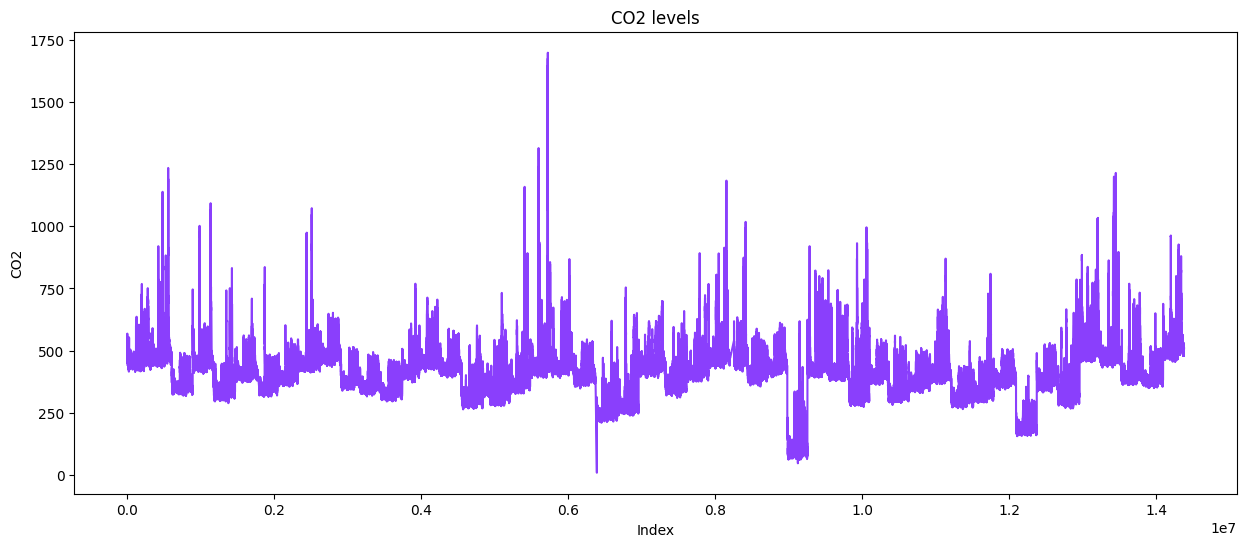

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['co2'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('CO2 levels')
plt.show()

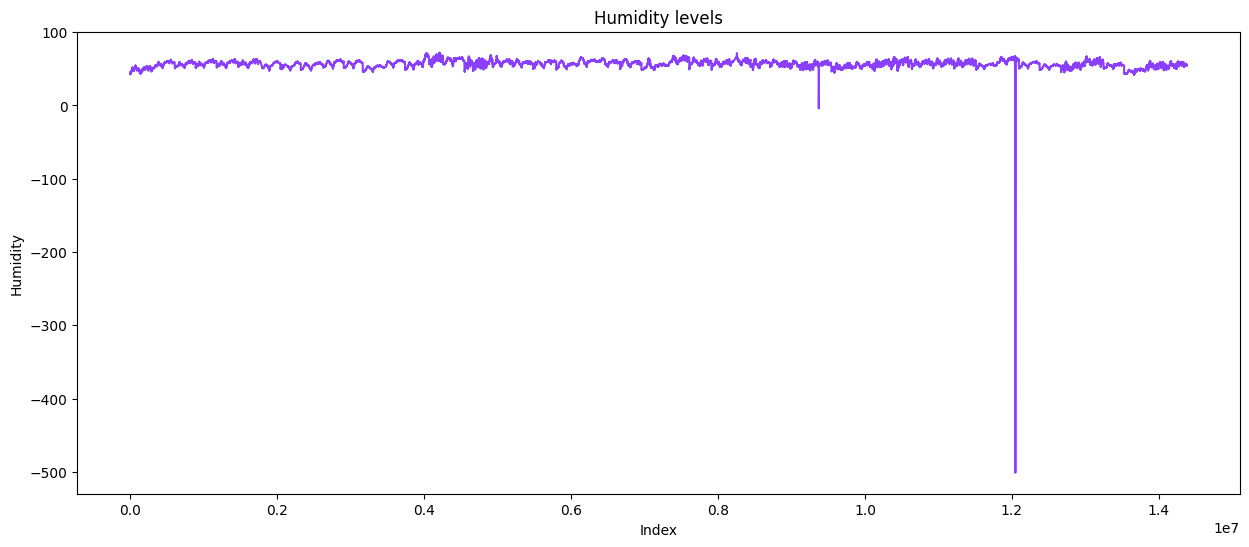

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['humidity'], label='CO2', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Humidity')
plt.title('Humidity levels')
plt.show()

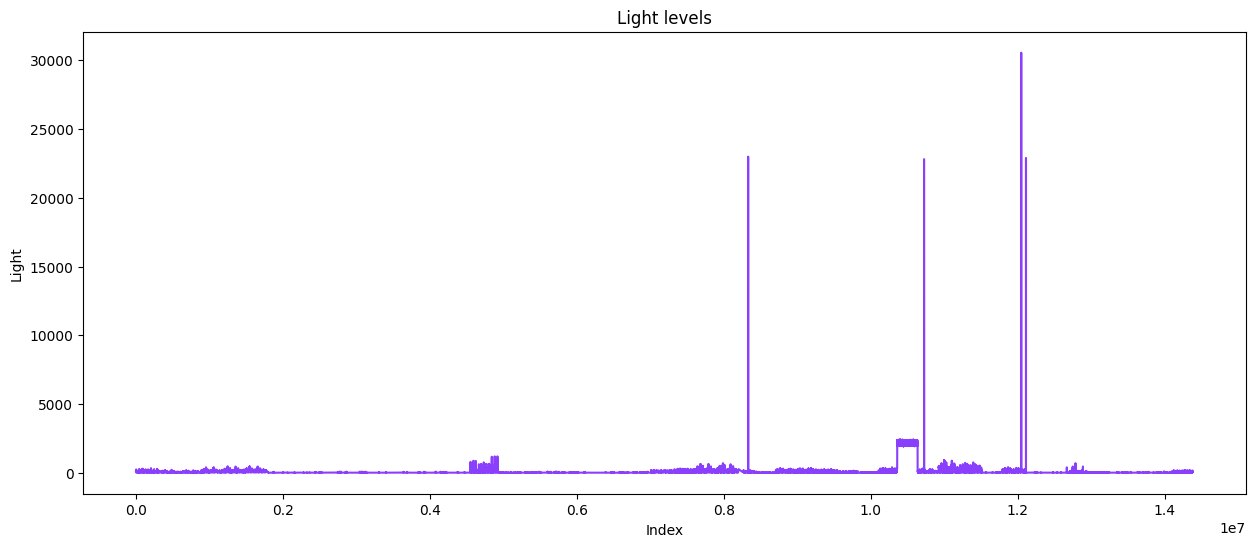

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['light'], label='Light', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Light')
plt.title('Light levels')
plt.show()

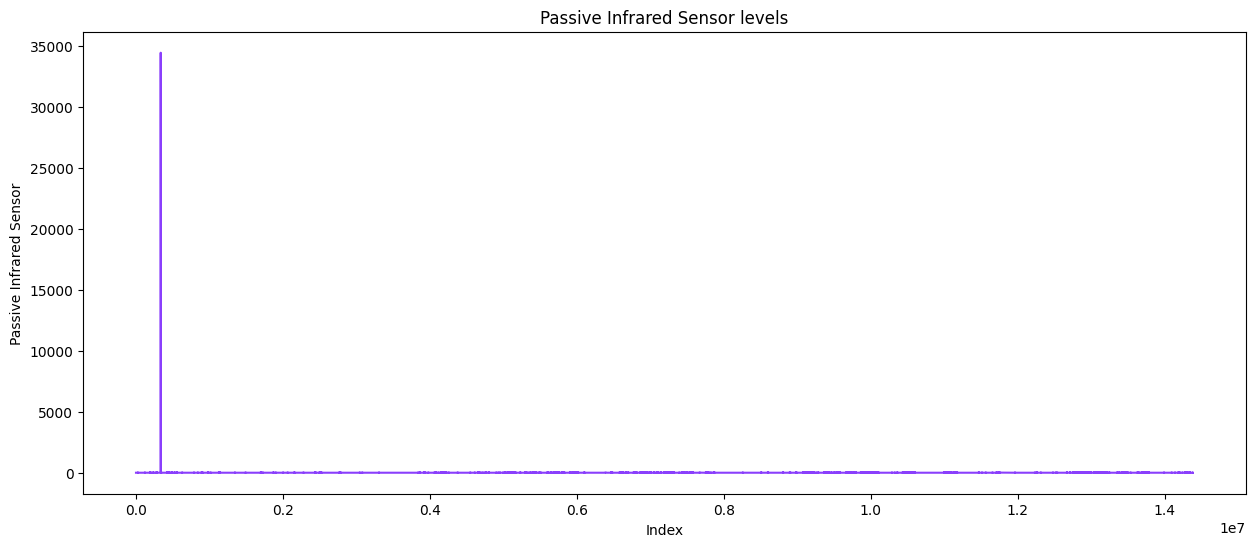

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['pir'], label='Passive Infrared Sensor', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Passive Infrared Sensor')
plt.title('Passive Infrared Sensor levels')
plt.show()

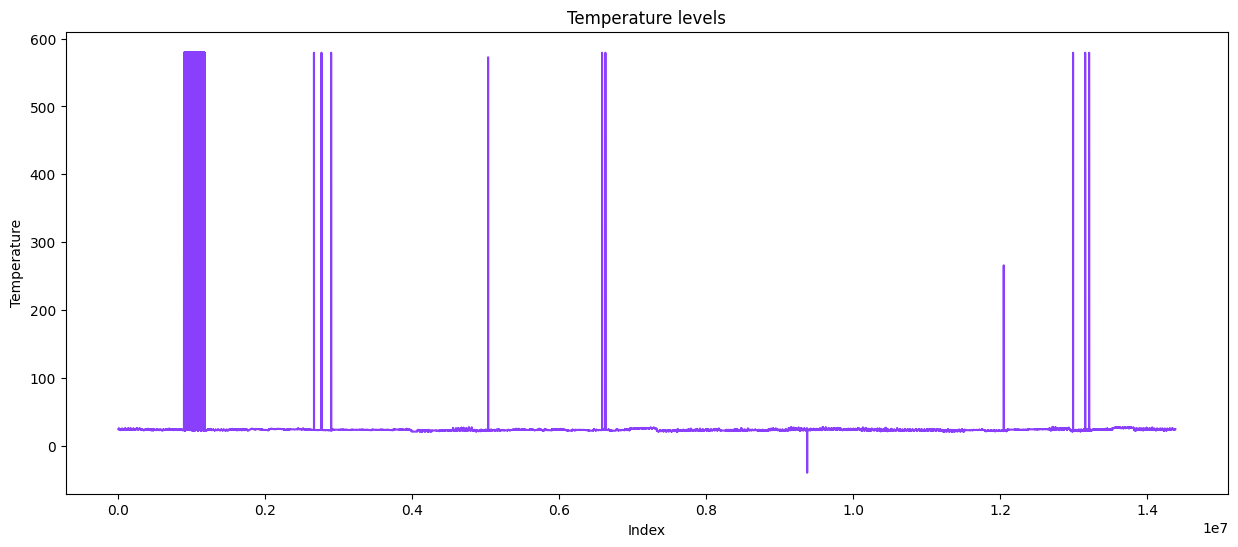

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data['temperature'], label='Temperature', color='#8A3FFC')
plt.xlabel('Index')
plt.ylabel('Temperature')
plt.title('Temperature levels')
plt.show()

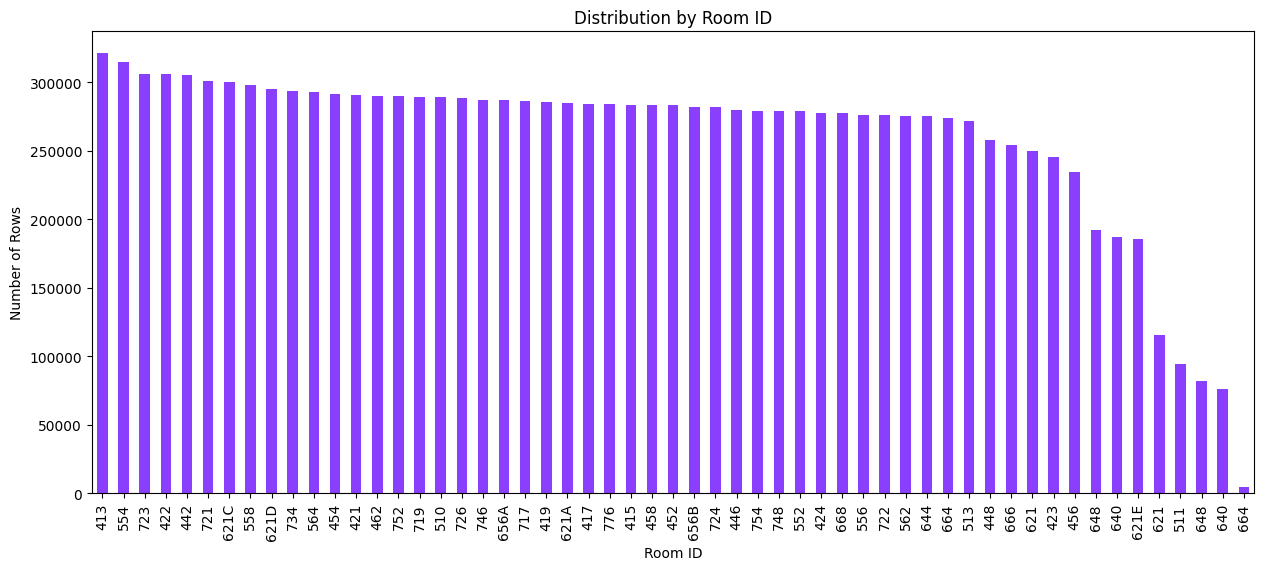

In [24]:
plt.figure(figsize=(15, 6))
# Count the number of rows for each room_id
room_id_counts = data['roomid'].value_counts()

# Plotting the bar plot
room_id_counts.plot(kind='bar', color = '#8A3FFC')

# Adding labels and title
plt.xlabel('Room ID')
plt.ylabel('Number of Rows')
plt.title('Distribution by Room ID')

# Display the plot
plt.show()

EDA on Temperature Vs All Other Columns

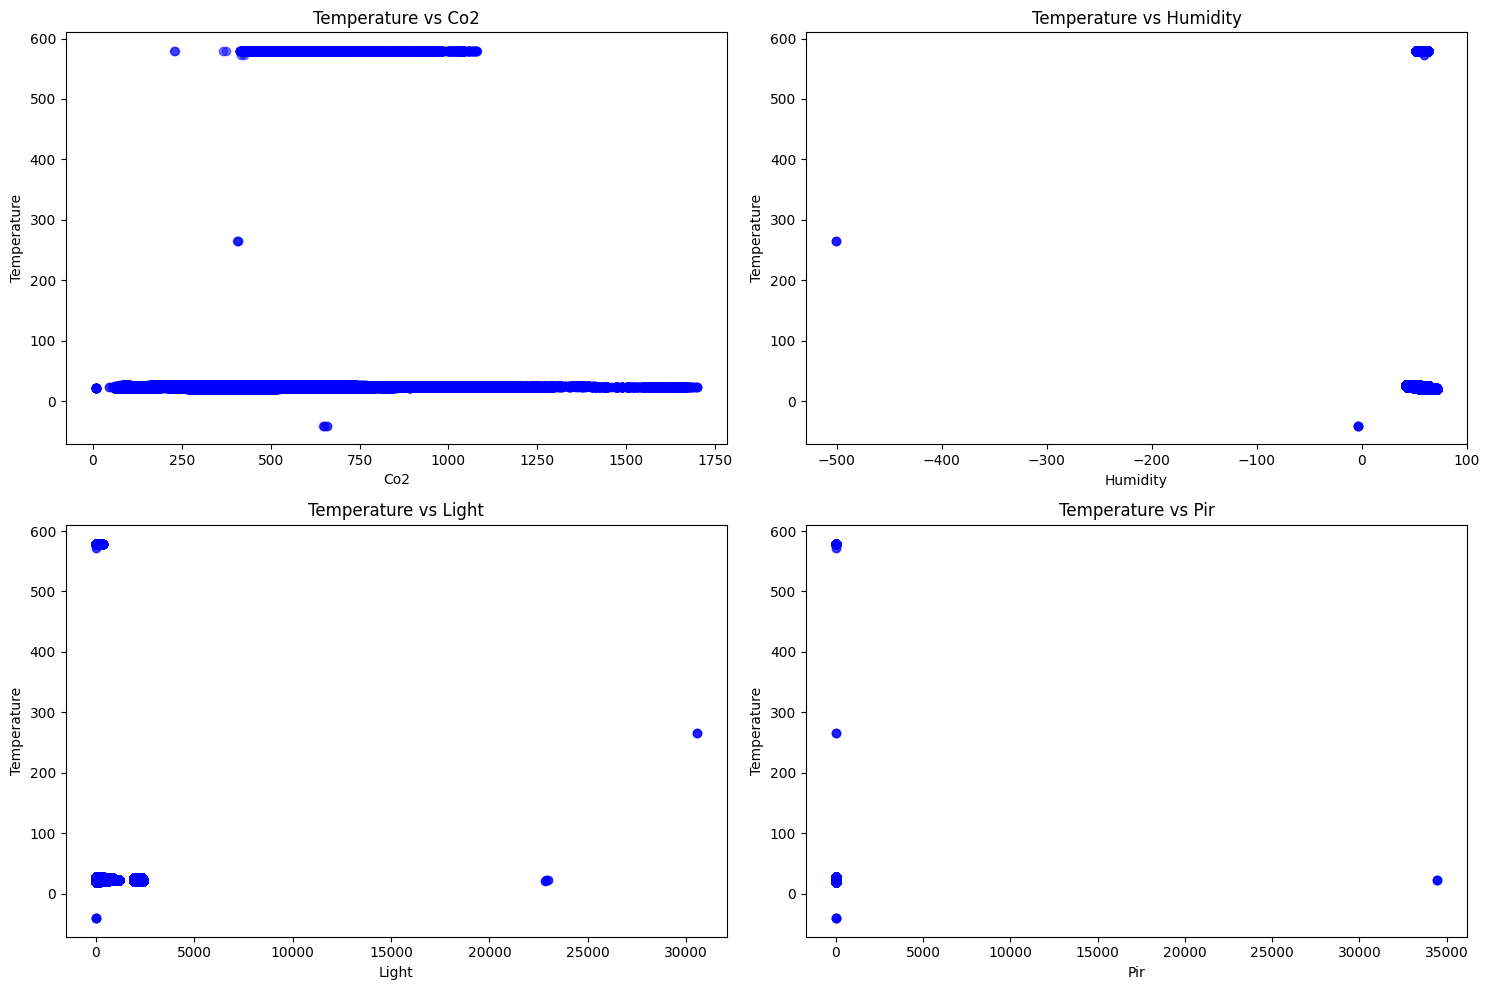

In [25]:
# Columns to plot temperature against
columns_to_plot = ['co2', 'humidity', 'light', 'pir']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Iterate through columns and plot temperature against each column
for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.scatter(data[column], data['temperature'], color='blue', alpha=0.5)
    ax.set_xlabel(column.capitalize())  
    ax.set_ylabel('Temperature')
    ax.set_title(f'Temperature vs {column.capitalize()}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
# Encode 'roomid' category column
roomid_encoded = pd.factorize(data['roomid'])[0]

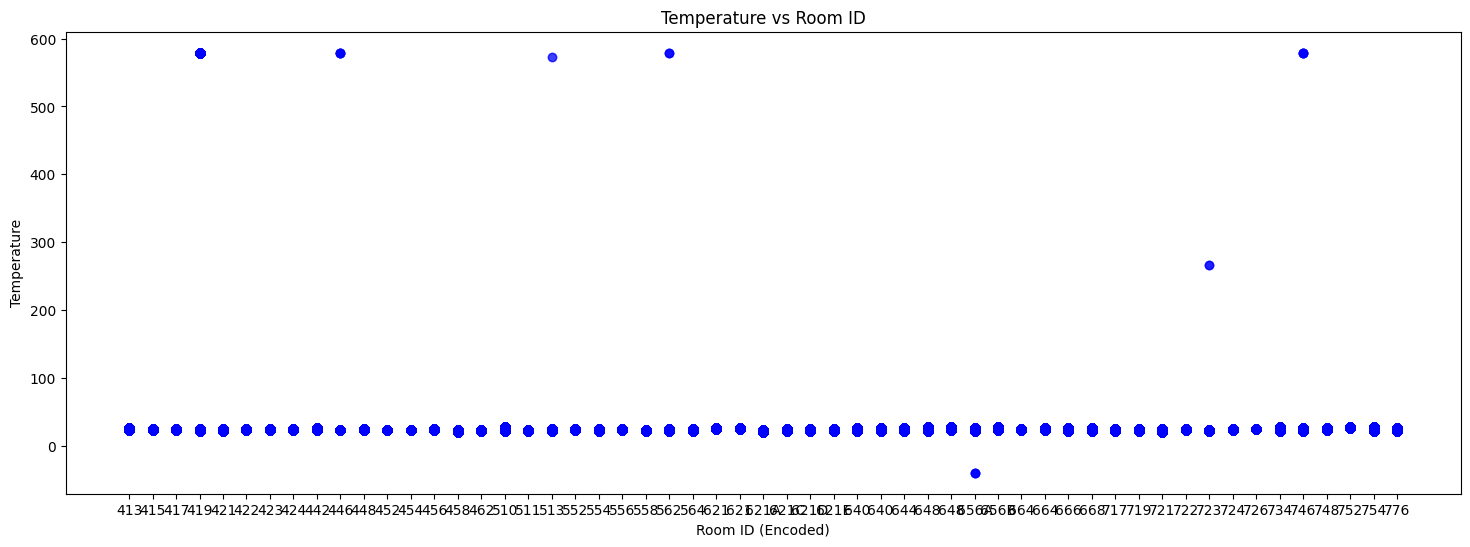

In [27]:
# Create scatter plot of temperature against 'roomid'
plt.figure(figsize=(18, 6))
plt.scatter(roomid_encoded, data['temperature'], color='blue', alpha=0.5)
plt.xlabel('Room ID (Encoded)')
plt.ylabel('Temperature')
plt.title('Temperature vs Room ID')
plt.xticks(range(len(data['roomid'].unique())), data['roomid'].unique())  
plt.show()

In [28]:
# Select columns of interest
columns_of_interest = ["co2", "humidity", "light", "pir", "temperature"]

Pair Plots of The Float Columns

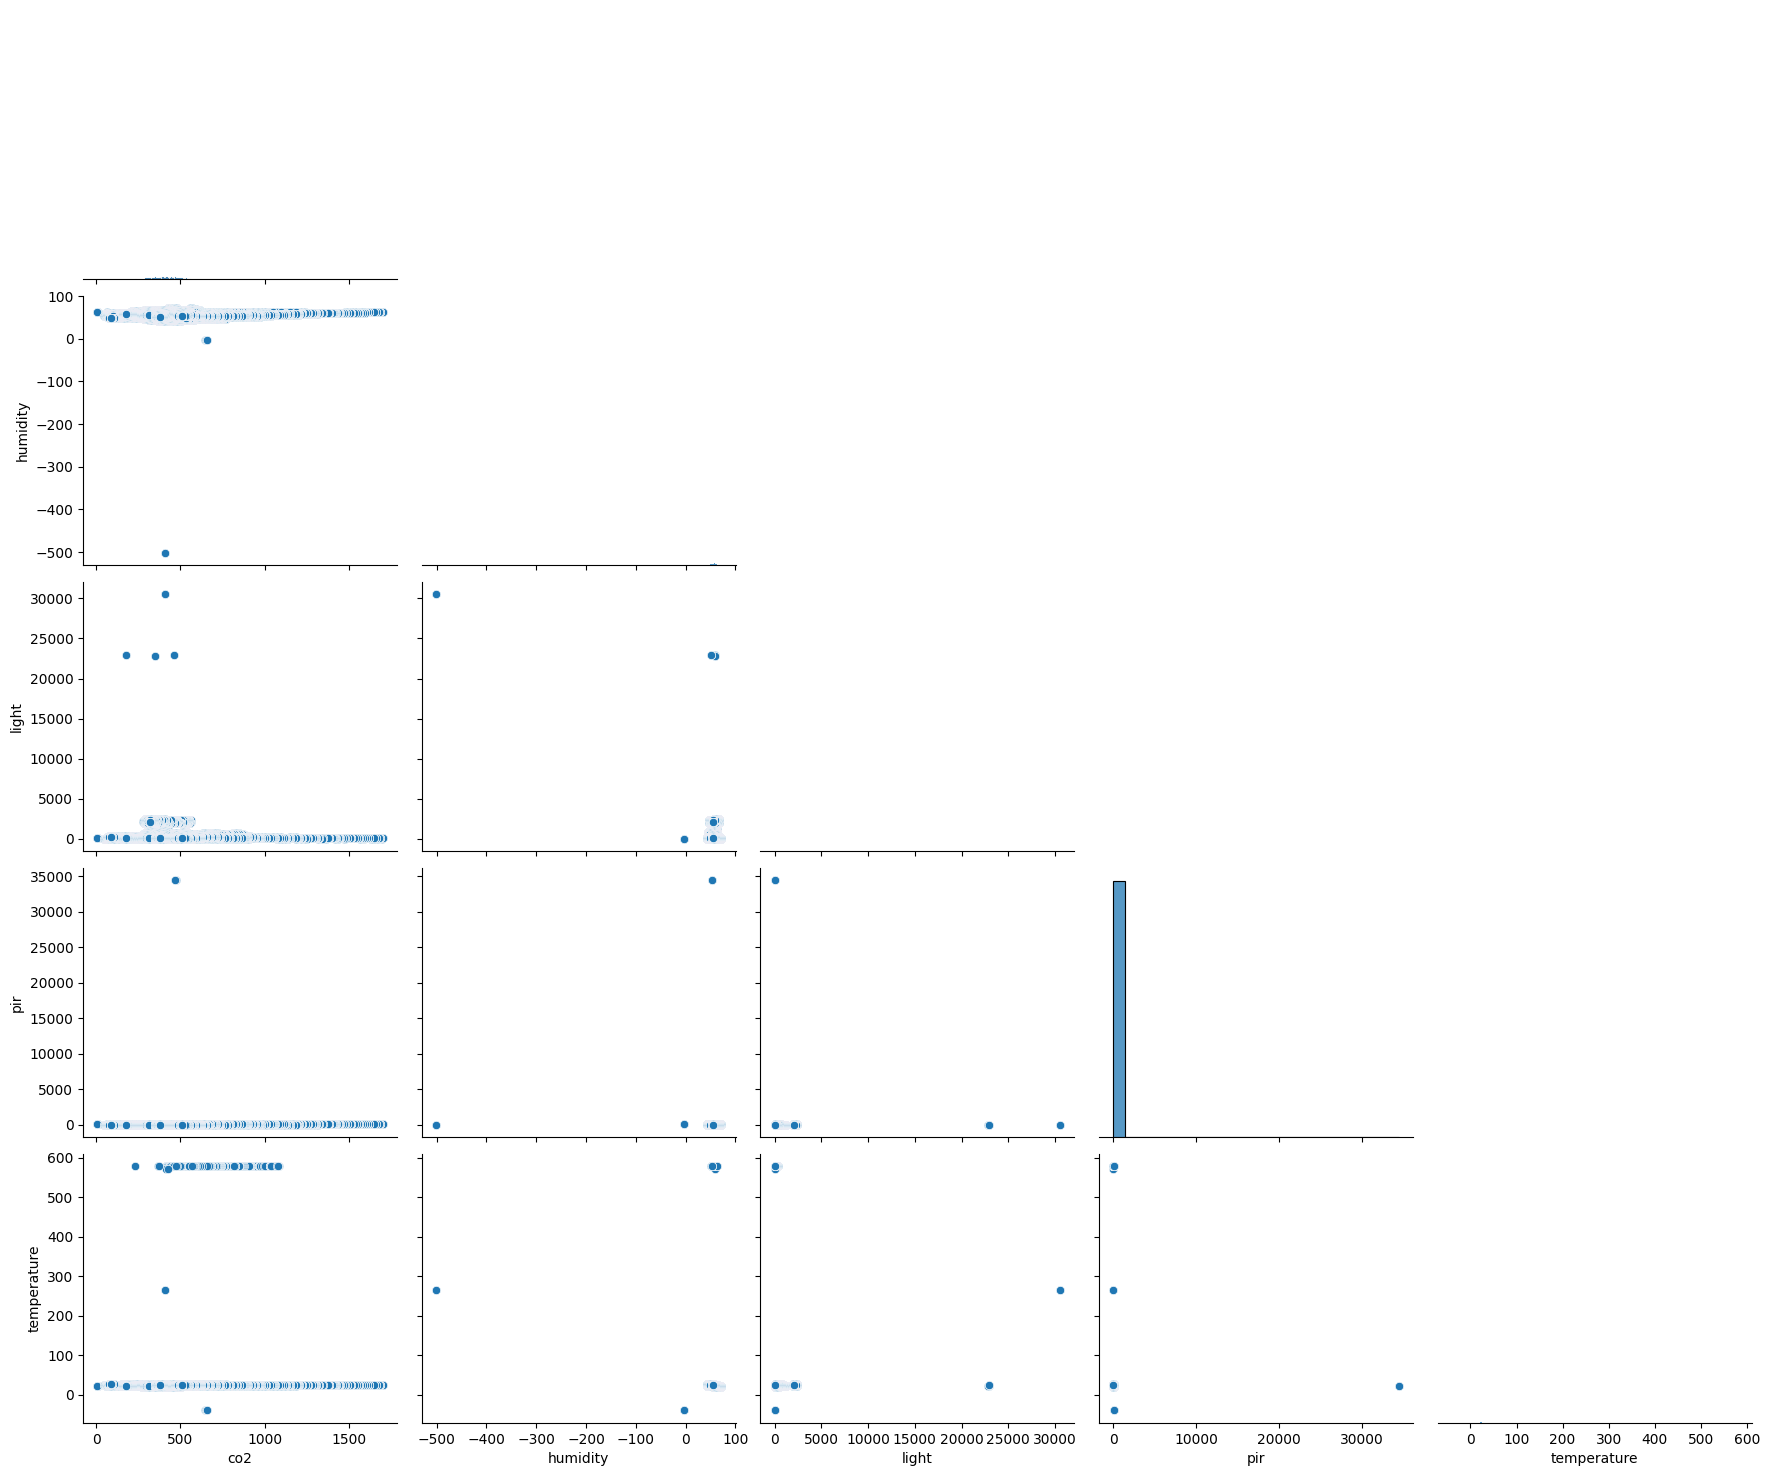

In [29]:
sns.pairplot(data[columns_of_interest], diag_kind="hist", height=3, aspect=1.2, corner=True)
plt.show()

Histograms of all the columns in 1 frame 

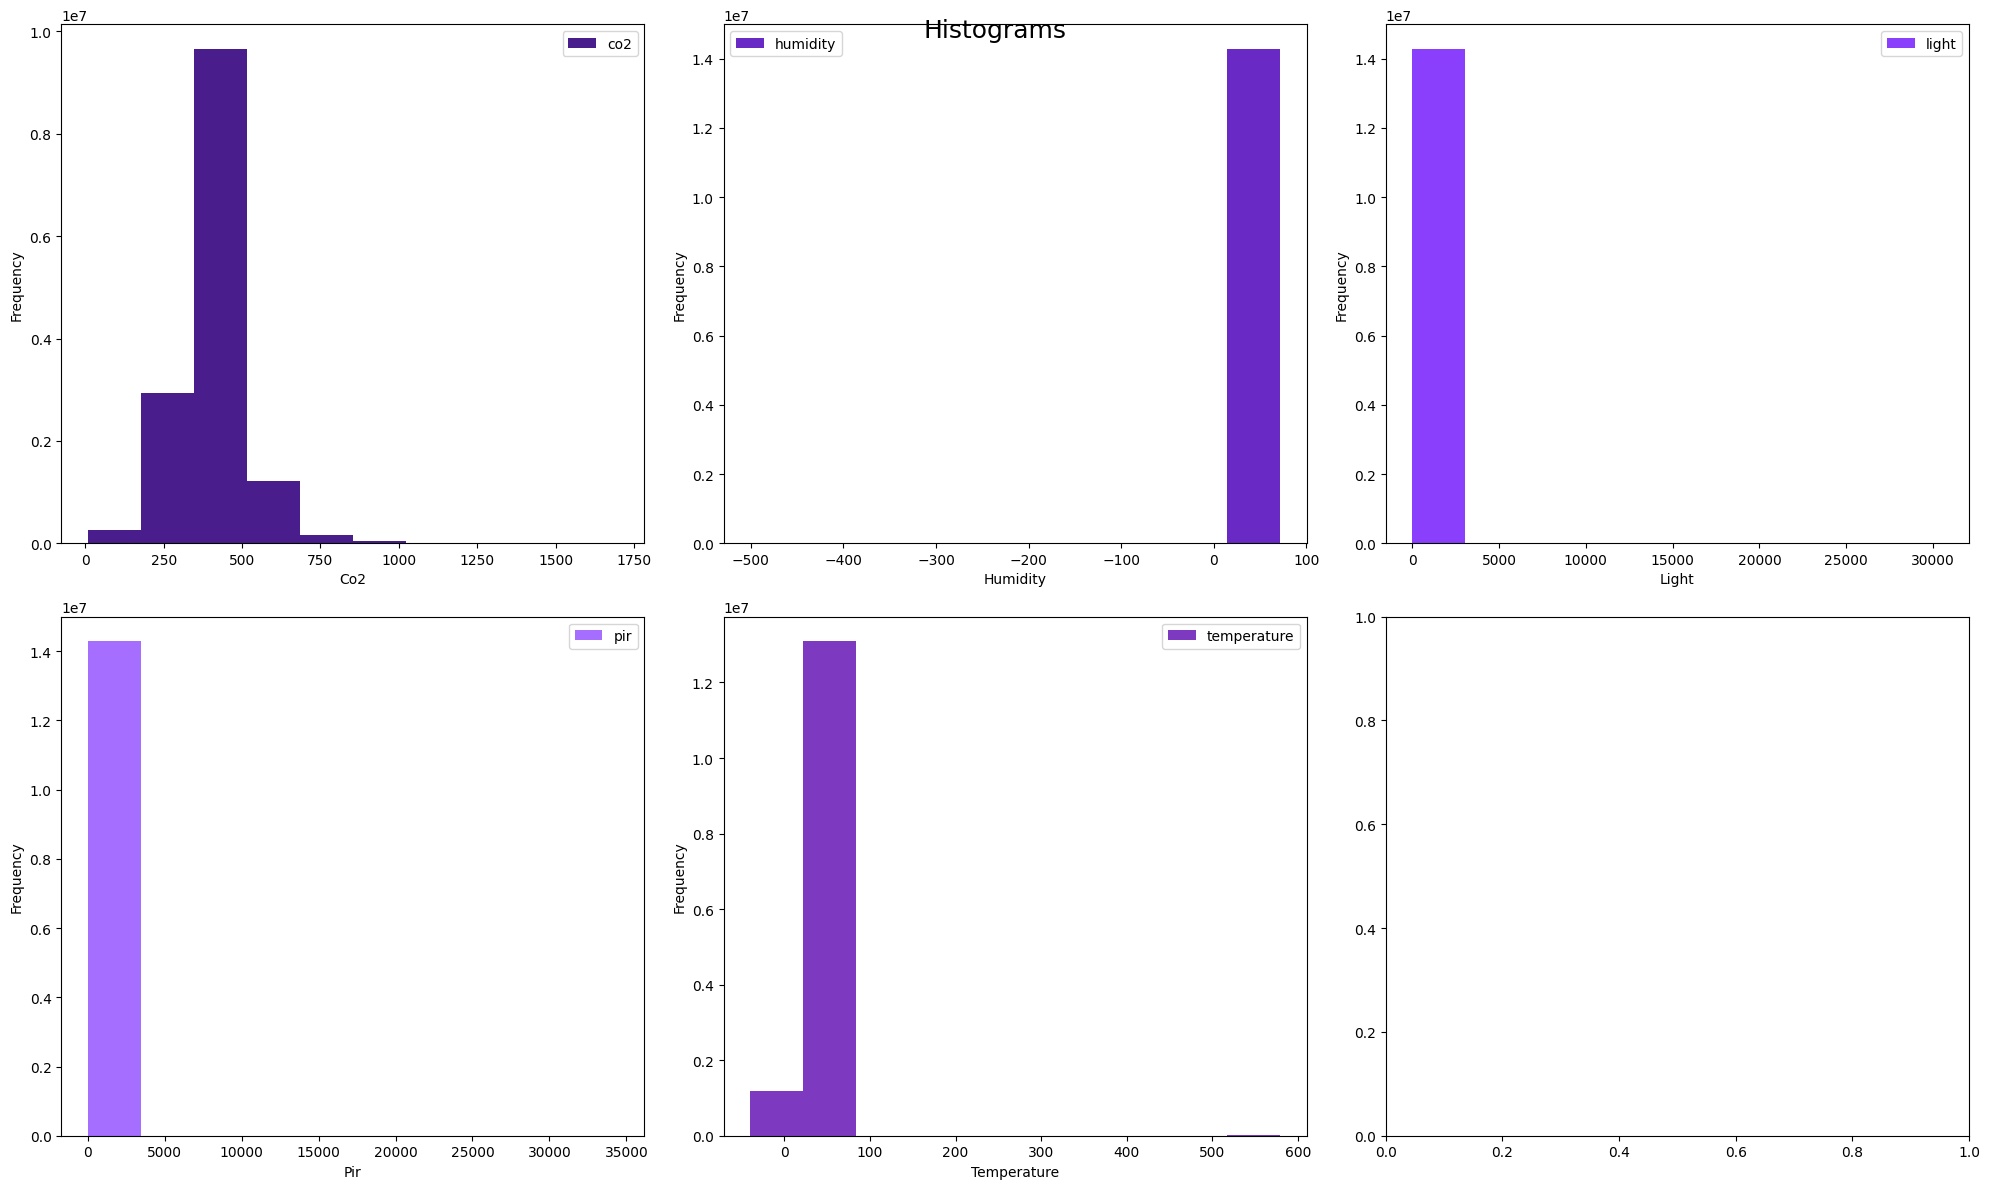

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

colors = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#7D3AC1']

for index, column in enumerate(columns_of_interest):
    ax = axes.flatten()[index]
    ax.hist(data[column], color=colors[index], label=column, bins=10) 
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')
    ax.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histograms', size=18)

# Show the plot
plt.show()

Running Basic Machine Learnong Algorithms on the Dataset

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
X = data[['co2', 'humidity', 'light', 'pir']]  # Features
y = data['temperature']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Linear Regression with specific parameters
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_lr = linear_regression_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)

Linear Regression:
Mean Squared Error: 439.64901197994976
Mean Absolute Error: 1.8343196170822658
R-squared: 0.0026520552958941845


In [22]:
# Decision Tree with specific parameters
decision_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_split=2)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared:", r2_dt)


Decision Tree:
Mean Squared Error: 429.36137577383073
Mean Absolute Error: 1.9656712309938238
R-squared: 0.02598965539609477


In [23]:
# Random Forest with specific parameters
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=2)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared:", r2_rf)


Random Forest:
Mean Squared Error: 429.23754738964806
Mean Absolute Error: 1.9621073001058495
R-squared: 0.026270561257578318


In [28]:
# K-Nearest Neighbors with specific parameters
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print("Mean Squared Error:", mse_knn)
print("Mean Absolute Error:", mae_knn)
print("R-squared:", r2_knn)


K-Nearest Neighbors:
Mean Squared Error: 459.3873557282306
Mean Absolute Error: 1.6740230227230712
R-squared: -0.0421245643092667


Deep Learning Modelss 

In [24]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
# Multilayer Perceptron (MLP) with specific parameters
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("\nMultilayer Perceptron (MLP):")
print("Mean Squared Error:", mse_mlp)
print("Mean Absolute Error:", mae_mlp)
print("R-squared:", r2_mlp)


Multilayer Perceptron (MLP):
Mean Squared Error: 438.8526316295778
Mean Absolute Error: 2.1251238834787727
R-squared: 0.004458651657999635


In [27]:
# Gradient Boosting Regressor with specific parameters
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, loss='squared_error')
gradient_boosting_model.fit(X_train, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R-squared:", r2_gb)


Gradient Boosting Regressor:
Mean Squared Error: 420.6795594957014
Mean Absolute Error: 1.941148828384351
R-squared: 0.04568443779147924


In [30]:
# Collecting evaluation metrics of all models into a dictionary
pd.set_option('display.width', 1000)
results_dict = {
    "Linear Regression": [mse_lr, mae_lr, r2_lr],
    "Decision Tree": [mse_dt, mae_dt, r2_dt],
    "Random Forest": [mse_rf, mae_rf, r2_rf],
    "K-Nearest Neighbors": [mse_knn, mae_knn, r2_knn],
    "Multilayer Perceptron (MLP)": [mse_mlp, mae_mlp, r2_mlp],
    "Gradient Boosting Regressor": [mse_gb, mae_gb, r2_gb]
}

# Convert the dictionary into a DataFrame
results_df = pd.DataFrame(results_dict, index=['Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

# Transpose the DataFrame for better readability
results_df = results_df.T

print("Model Comparison:")
print(results_df)

Model Comparison:
                             Mean Squared Error  Mean Absolute Error  R-squared
Linear Regression                    439.649012             1.834320   0.002652
Decision Tree                        429.361376             1.965671   0.025990
Random Forest                        429.237547             1.962107   0.026271
K-Nearest Neighbors                  459.387356             1.674023  -0.042125
Multilayer Perceptron (MLP)          438.852632             2.125124   0.004459
Gradient Boosting Regressor          420.679559             1.941149   0.045684


    "Support Vector Machine": [mse_svm, mae_svm, r2_svm],